# Default Parameters 

# Reading off-axis rays from CSV files to plot Hyp and Par hits on the module shells

### @Milo, Dec 2017

Reading 30arcmin off-axis rays with default parameters (default blocker size)

Defining customed function to read the rays:

In [1]:
from foxsisim.util import load_rays
import numpy as np
Rrays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/DefaultParameters/Rays_Default_Params_100K_0.csv')
print('Number of rays0 : {:d}'.format(len(Rrays)))

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/DefaultParameters/Rays_Default_Params_100K_0.csv loaded.
Number of rays0 : 99971


In [2]:
prays = [ray.pos for ray in Rrays]
orays = [ray.ori for ray in Rrays]
srays = [ray.src for ray in Rrays]
drays = [ray.des for ray in Rrays]
trays = [ray.tag for ray in Rrays]
hrays = [ray.hist for ray in Rrays]
brays = [ray.bounces for ray in Rrays]
deadrays = [ray.dead for ray in Rrays]

Hrays = [ray for ray in Rrays if (ray.bounces ==1 and ray.hist[2] >= 30 )]
Prays = [ray for ray in Rrays if (ray.bounces ==1 and ray.hist[2] <= 30 )]
Hx, Hy = np.array([ray.hist[0] for ray in Hrays]), np.array([ray.hist[1] for ray in Hrays])
Px, Py = np.array([ray.hist[0] for ray in Prays]), np.array([ray.hist[1] for ray in Prays])

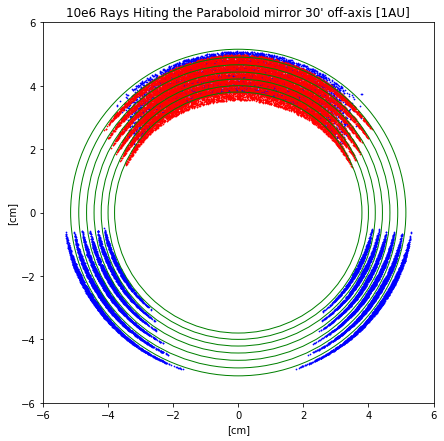

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)

# Plot random points
plt.scatter(Px,Py,s=0.5,color='b')
plt.scatter(Hx,Hy,s=0.5,color='r')
plt.title('10e6 Rays Hiting the Paraboloid mirror 30\' off-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

### My idea is to reproduce the gaps. Let's use the exact same code I used to generate Ryas a couple of months ago and try to identify the problem.

In [7]:
from foxsisim.util import load_rays
import numpy as np
Rrays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/DefaultParameters/Rays_Default_Params_100K.csv')
print('Number of rays0 : {:d}'.format(len(Rrays)))

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/DefaultParameters/Rays_Default_Params_100K.csv loaded.
Number of rays0 : 100000


In [8]:
orays = [ray.ori for ray in Rrays]
srays = [ray.src for ray in Rrays]
drays = [ray.des for ray in Rrays]
trays = [ray.tag for ray in Rrays]
hrays = [ray.hist for ray in Rrays]
brays = [ray.bounces for ray in Rrays]
deadrays = [ray.dead for ray in Rrays]

Hrays = [ray for ray in Rrays if (ray.bounces ==1 and ray.hist[2] >= 30 )]
Prays = [ray for ray in Rrays if (ray.bounces ==1 and ray.hist[2] <= 30 )]
Hx, Hy = np.array([ray.hist[0] for ray in Hrays]), np.array([ray.hist[1] for ray in Hrays])
Px, Py = np.array([ray.hist[0] for ray in Prays]), np.array([ray.hist[1] for ray in Prays])

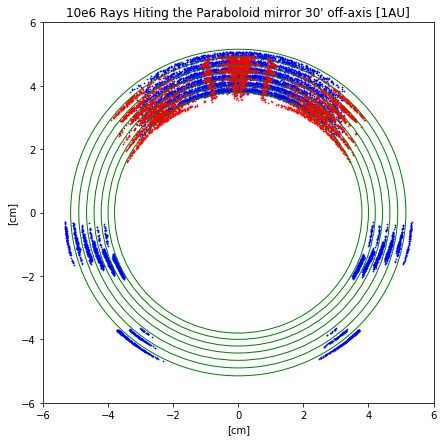

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)

# Plot random points
plt.scatter(Px,Py,s=0.5,color='b')
plt.scatter(Hx,Hy,s=0.5,color='r')
plt.title('10e6 Rays Hiting the Paraboloid mirror 30\' off-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

## Here I'm able to reproduce the gaps... why? I still don't know.

### Removing the passrays keywork Robust = True

In [18]:
from foxsisim.util import load_rays
import numpy as np
Rrays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/DefaultParameters/Rays_Default_Params_100K_1.csv')
print('Number of rays0 : {:d}'.format(len(Rrays)))

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/DefaultParameters/Rays_Default_Params_100K_1.csv loaded.
Number of rays0 : 100000


In [19]:
orays = [ray.ori for ray in Rrays]
srays = [ray.src for ray in Rrays]
drays = [ray.des for ray in Rrays]
trays = [ray.tag for ray in Rrays]
hrays = [ray.hist for ray in Rrays]
brays = [ray.bounces for ray in Rrays]
deadrays = [ray.dead for ray in Rrays]

Hrays = [ray for ray in Rrays if (ray.bounces ==1 and ray.hist[2] >= 30 )]
Prays = [ray for ray in Rrays if (ray.bounces ==1 and ray.hist[2] <= 30 )]
Hx, Hy = np.array([ray.hist[0] for ray in Hrays]), np.array([ray.hist[1] for ray in Hrays])
Px, Py = np.array([ray.hist[0] for ray in Prays]), np.array([ray.hist[1] for ray in Prays])

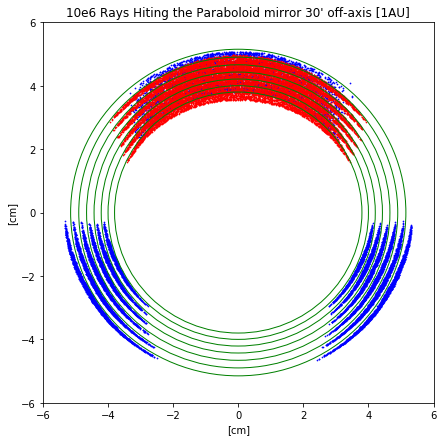

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)

# Plot random points
plt.scatter(Px,Py,s=0.5,color='b')
plt.scatter(Hx,Hy,s=0.5,color='r')
plt.title('10e6 Rays Hiting the Paraboloid mirror 30\' off-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

# GAPS PROBLEM FOUND

# Do not use passrays keywork Robust = True

Now me task is to overplot the simulation without gaps with the data we took in Huntsville. See Notebbok **NoGaps_Overplot_Sim-Data**